# Find the Final Statevector of a Circuit

## Introduction

This tutorial shows how to use Qiskit Aer™ to find the final statevector of simulated ideal (noise free) Qiskit Terra™ circuits.

## StatevectorSimulator


The `StatevectorSimulator` executes a single shot of a Qiskit `QuantumCircuit` and returns the final quantum statevector of the simulation.  The circuit may contain *gates*, and also *measure*, *reset*, and *conditional* operations.

Import the `StatevectorSimulator`.

In [ ]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

from qiskit.providers.aer import StatevectorSimulator

### Simulating a quantum circuit

The basic operation executes a quantum circuit and returns a counts dictionary of measurement outcomes. Here we execute a simple circuit that prepares a 2-qubit Bell-state $|\psi\rangle = \frac{1}{2}(|0,0\rangle + |1,1 \rangle)$ and measures both qubits.

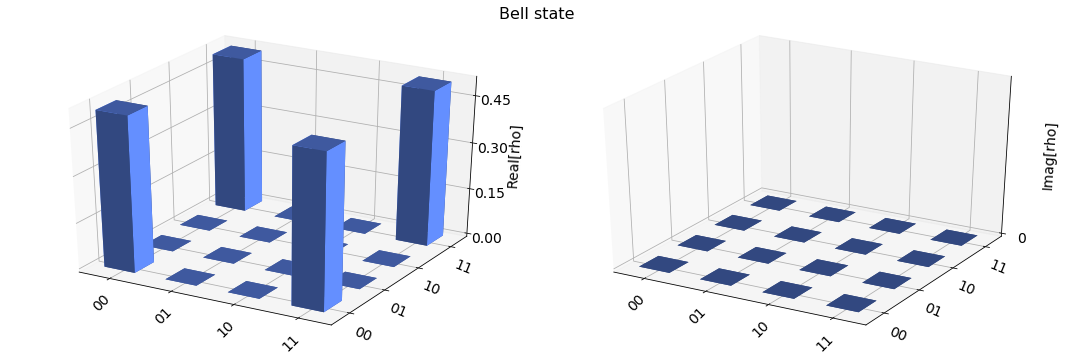

In [7]:
# Construct quantum circuit without measure
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

### Simulating a quantum circuit with measurement

Note that if a circuit contains *measure* or *reset* the final statevector will be a conditional statevector *after* simulating wave-function collapse to the outcome of a measure or reset. For the Bell-state circuit this means the final statevector will be *either* $|0,0\rangle$ *or* $|1, 1\rangle$.

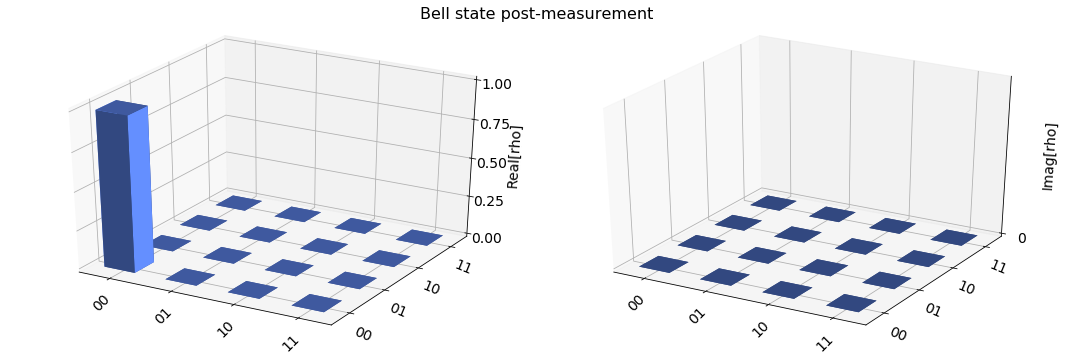

In [8]:
# Construct quantum circuit with measure
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
circ = QuantumCircuit(qr, cr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.measure(qr, cr)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state post-measurement')